# Gradient Descent
## Faqih Mahardika (21/482551/PA21039)

### Import dependencies

In [1]:
import matplotlib.pyplot as plt

### Variables


n = number of neuron in hidden layer <br>
wb = weights and bias at end <br>
dwb = derivatives of weights and bias at end <br>
h = delta for gradient descent

In [2]:
t = [1,2,3,4,5,6]
y = [100,500,600,200,400,300]
# y_min = min(y)
# y_max = max(y)
# y_normalized = [(val - y_min) / (y_max - y_min) for val in y]
# y_origin = y
# y = y_normalized
yp_ = [0] * len(y)
n = 3 
wb = [0.1]*(n+1)
dwb = [0.1]*(n+1)
h = 10 **(-8)

In [3]:
# storing epoch data history
alpha = 10 **(-8)
SEs = []
yp_s = []
norm_ds = []

### functions

In [4]:
def yp(i):
    sum = 0
    count = 1

    if(i < n):
        return y[i]
    
    while count <= n:
        sum = sum + yp_[i-count]*wb[count-1]
        count = count + 1
    
    return sum + wb[n]

In [5]:
def yp_update():
    for i, val in enumerate(y):
        yp_[i] = yp(i)
    return yp_

In [6]:
def SE():
    diff = 0
    sum = 0
    for i, val in enumerate(yp_):
        if (i >= n):
            diff = (yp_[i]-y[i])**2 
            sum += diff 
    return sum

In [7]:
# initially named after SE gradient
def dwb_update():
    for i, val in enumerate(wb):
        temp = wb[i]

        wb[i] = temp + h
        yp_update()
        SE1 = SE()

        wb[i] = temp - h
        yp_update()
        SE2 = SE()
        
        dwb[i] = (SE1 - SE2)/(2*h)
        wb[i] = temp
    
    return dwb

In [8]:
def wb_update():
    for i, val in enumerate(wb):
        wb[i] = wb[i] - alpha*dwb[i]
    return wb

In [9]:
def norm_d():
    sum = 0
    for d in dwb:
        sum = sum + d*d
    return sum ** (1/2)


In [10]:
norm_d_ = 1  # Initialize norm_d_ to start the loop

while norm_d_ > 10 ** (-5):  # Continue until the gradient norm is small enough, it's the callback param apparently
    yp_update()            # Update predictions
    wb_update()            # Update weights
    dwb_update()           # Update weight derivatives

    se_value = SE()        # Calculate SE for the current epoch
    SEs.append(se_value)   # Store SE value
    yp_s.append(list(yp_)) # Store a copy of the current predictions

    norm_d_ = norm_d()     # Calculate and store the norm of the gradient
    norm_ds.append(norm_d_)

In [11]:
def plot_SEs(SEs):
    plt.figure(figsize=(10, 6))
    plt.plot(SEs, marker='o', linestyle='-', color='b', label='Sum of Squared Errors (SEs)')
    plt.title('Sum of Squared Errors (SEs) Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('SEs')
    plt.grid(True)
    plt.legend()
    plt.show()

In [26]:
def plot_norm_ds(norm_ds):
    plt.figure(figsize=(10, 6))
    plt.plot(norm_ds, marker='o', linestyle='-', color='b', label='normds')
    plt.title('normal of derivatives')
    plt.xlabel('Epoch')
    plt.ylabel('norm_d')
    plt.grid(True)
    plt.legend()
    plt.show()

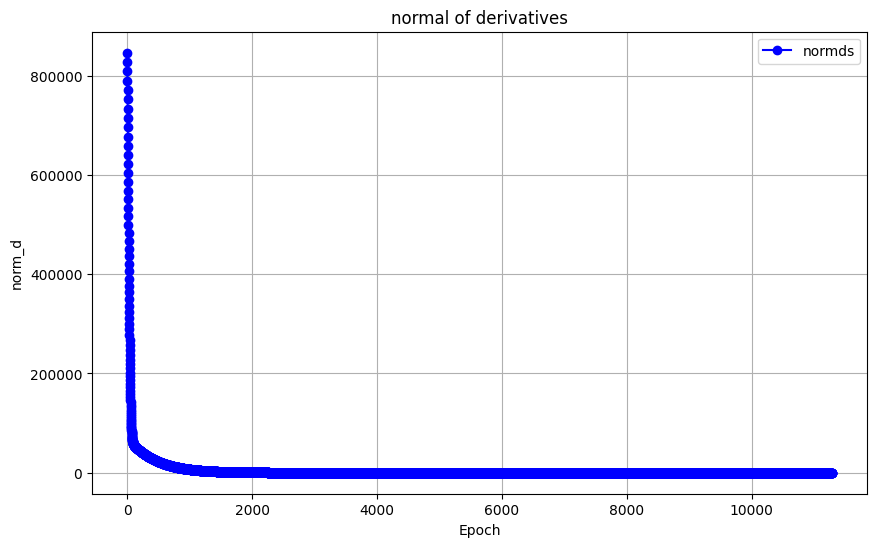

In [27]:
plot_norm_ds(norm_ds)

In [12]:
print(SEs)

[130124.29456464814, 123045.23649865584, 116277.48503996337, 109814.91466499734, 103651.07071957942, 97779.17865160262, 92192.15757134059, 86882.6378926076, 81842.98263413705, 77065.31193251186, 72541.53032381878, 68263.35635308959, 64222.353956264735, 60409.965191536074, 56817.54373238527, 53436.388732966996, 50257.77853058476, 47273.00379240998, 44473.39969195903, 41850.37680209588, 39395.450281299636, 37100.267245828465, 34956.63197593122, 32956.52885343302, 31092.142914094988, 29355.87790049806, 27740.37182850922, 26238.510041103364, 24843.43584458195, 23548.558717117477, 22347.560277645778, 21234.39811536123, 20203.30758420789, 19248.801766902023, 18365.669741093363, 17548.97334900342, 16794.04260130498, 16096.469908820254, 15452.103319638481, 14857.038893783738, 14307.612383510777, 13800.390358983801, 13332.160917117984, 12899.924082702857, 12500.882029527857, 12132.429198458773, 11792.142420351718, 11477.771118443183, 11187.227634232346, 10918.577772054801, 10670.031565483707, 1

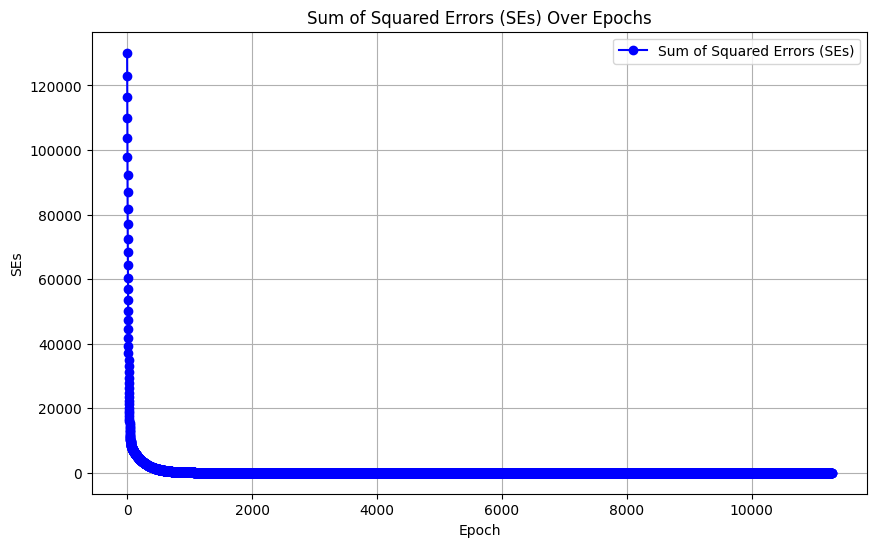

In [13]:
plot_SEs(SEs)

In [14]:
def plot_y(y,yp):# Plotting y and yp_
    plt.figure(figsize=(8, 5))
    plt.plot(y, label='Actual y', color='blue', marker='o')   # Plot y with blue color
    plt.plot(yp, label='Predicted yp', color='red', marker='x')  # Plot yp_ with red color

    # Adding labels and title
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title('Actual y vs Predicted yp_')

    # Adding legend to differentiate between y and yp_
    plt.legend()

    # Display the plot
    plt.grid(True)
    plt.show()

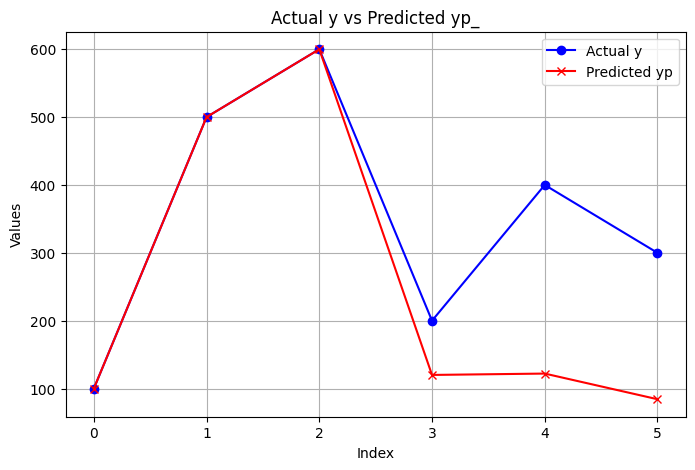

In [15]:
plot_y(y,yp_s[0])

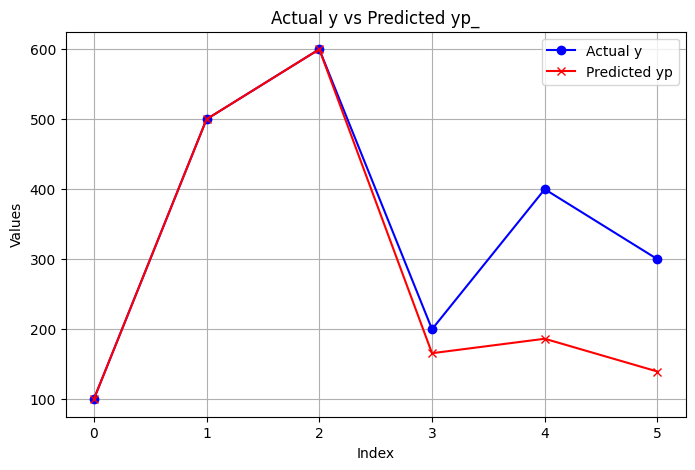

In [16]:
plot_y(y,yp_s[10])

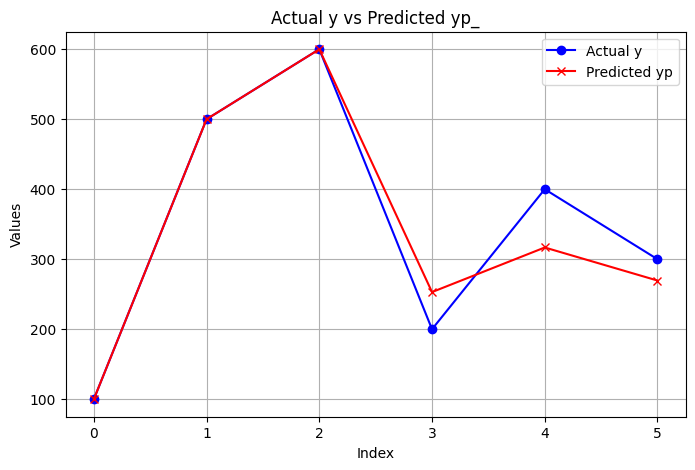

In [17]:
plot_y(y,yp_s[50])

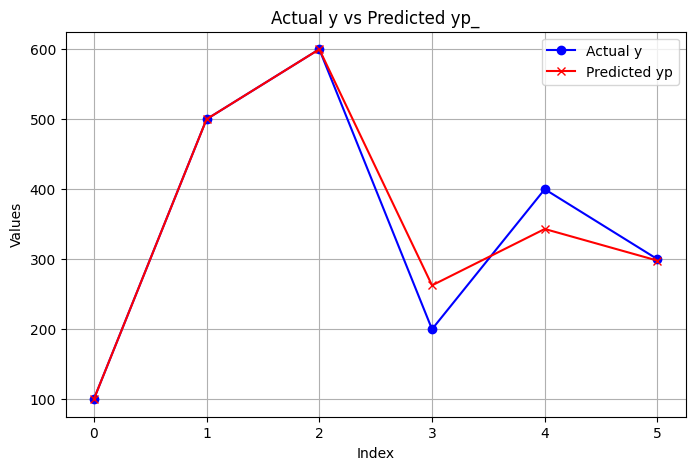

In [18]:
plot_y(y,yp_s[90])

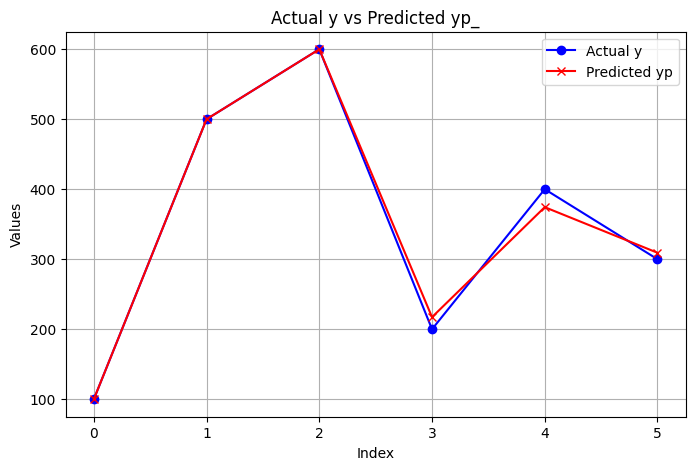

In [19]:
plot_y(y,yp_s[500])

In [20]:
# y_original1 = [val * (y_max - y_min) + y_min for val in y_normalized]
print("yp: ", yp_)
print("w1,w2,w3,b =", wb)
print("SE =", SE())

yp:  [100, 500, 600, 199.99999998485896, 399.9999999805868, 299.9999999985087]
w1,w2,w3,b = [-0.017142327294810616, 0.34084071008803385, 0.3976474951718514, 0.10029181054329447]
SE = 6.083482016485529e-16


###

In [21]:
print(yp(3))
print(yp(4))
print(yp(5))
print(yp(6))
print(SE())

199.99999999485897
399.9999999905868
300.0000000085087
210.82337667907188
6.083482016485529e-16


In [22]:
print(-0.004*600 + 0.321*500 + 0.4152*100 + 0.1 )
print(-0.004*200 + 0.321*600 + 0.4152*500 + 0.1 )
print(-0.004*400 + 0.321*200 + 0.4152*600 + 0.1 )
print(-0.004*300 + 0.321*400 + 0.4152*200 + 0.1 )

199.72
399.5
311.82000000000005
210.34
